# Data Analysis Project — Telco Customer Churn
Motivation and aim for this project: To analyze the dataset and to make actionable insights to retain customers 
and increase customers’ lifetime values

In [59]:
####Part 0: Imports the libraries for data loading,visualizition
####Reading data using pandas 
###Count number of rows, columns
### Using DataFrame.head() to get first 5 rows of DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import re

import warnings
warnings.filterwarnings("ignore")

In [60]:
df =  pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [61]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Description of this dataset 
The data set includes information about:
    Your answer here

Description of this dataset

The data set includes information about:
    
   - Customer demographic information: Gender, Dependents, SeniorCitizen
   - Types of products/services each customer uses: phone service, internet service, online security,...
   - Payment amount and method: total charges, monthly charge, payment method, contract
   - Customer churn or not

In [62]:
def plot_pie(table, column):
    fig, ax =plt.subplots(figsize = (10, 4))
    data = table[column].value_counts()
    ax.pie(data.values, labels=data.index, autopct='%1.1f%%')

def stacked_hbar_chart(df, feature, column, target, **kwargs):
    pivot_df = pd.pivot_table(df, values=target, index=feature, columns= column, aggfunc=len)
    ax = pivot_df.div(pivot_df.sum(axis=1),axis=0).plot(kind='barh', title=f'Non-Churn-rate based on {feature}',stacked=True,figsize=(13,7))
    ax.get_legend()

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if x != 0:
            x = 0.9
        ax.annotate('{:.1%}'.format(width),(x + 0.05, y + 0.13))

## encode for plot
def output_encode(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0

df['y'] = df['Churn'].apply(output_encode)


# PART 1: QUICK DATA CHECK

In [63]:
##Check data types using info() function 
df.info()
## What problem have you observed? -> fix it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The incorrect type of the TotalCharges column

In [64]:
###FIX IT
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'].isnull().sum()

11

In [65]:
##Check statistical information using describe()
df.describe()
##Make some conclusions 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


SeniorCitizen is binary type

In [66]:
###Check for null values in our data and decide how to handle null-value
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# PART 2: Exploratory Data Analysis: homework

## customerID: Customer ID \
## genderCustomer: gender (female, male) \
## SeniorCitizen: Whether the customer is a senior citizen or not (1, 0) \
## PartnerWhether: the customer has a partner or not (Yes, No) \
## Dependents: Whether the customer has dependents or not (Yes, No)\
## tenure: Number of months the customer has stayed with the company \
## PhoneService: Whether the customer has a phone service or not (Yes, No) \
## MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service) \
## InternetService: Customer’s internet service provider (DSL, Fiber optic, No) \
## OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service) \
## OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service) \
## DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service) \
## TechSupport: Whether the customer has tech support or not (Yes, No, No internet service) \
## StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service) \
## StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service) \
## Contract: The contract term of the customer (Month-to-month, One year, Two year)  \
## PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
## PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) \
## MonthlyCharges: The amount charged to the customer monthly \
## TotalCharges: The total amount charged to the customer \
## Churn: Whether the customer churned or not (Yes or No) \

In [67]:
###Check the balance of class label using value_counts()
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

##  Demographics

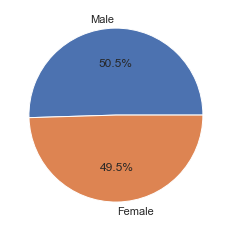

In [68]:
###Create a stacked percentage bar chart for each demographic attribute (gender, SeniorCitizen, Partner, Dependents), 
###showing the percentage of Churn for each category of the attribute
plot_pie(df, 'gender')
###Draw a conclusion

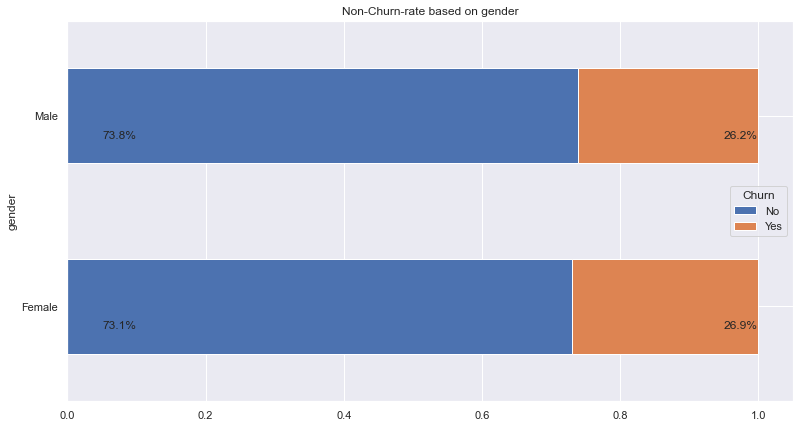

In [151]:
stacked_hbar_chart(df, 'gender','Churn', 'y')

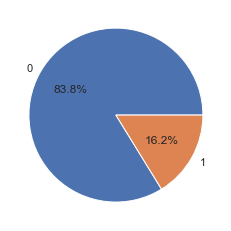

In [69]:
plot_pie(df, 'SeniorCitizen')

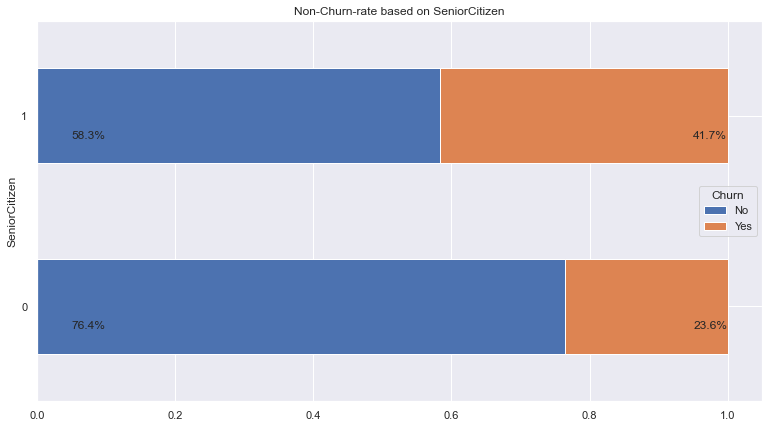

In [149]:
stacked_hbar_chart(df, 'SeniorCitizen','Churn', 'y')

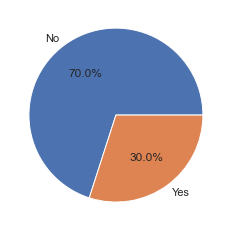

In [73]:
plot_pie(df, 'Dependents')

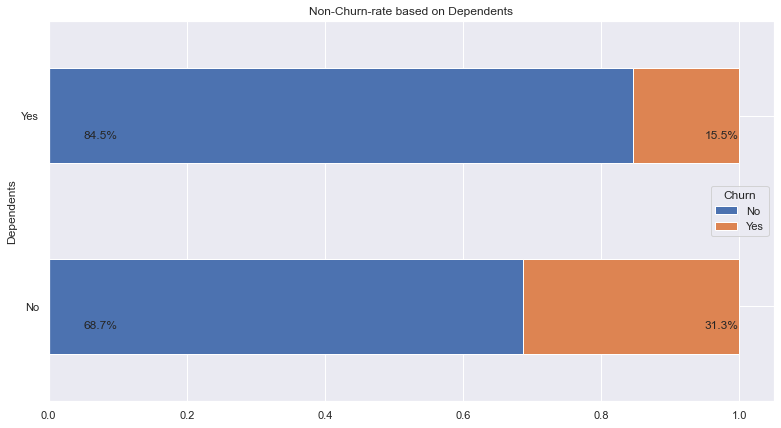

In [152]:
stacked_hbar_chart(df, 'Dependents','Churn', 'y')

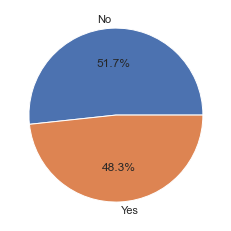

In [74]:
plot_pie(df, 'Partner')

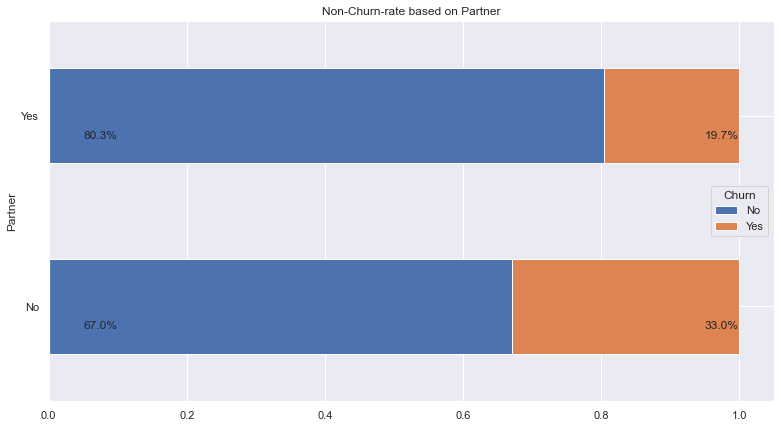

In [153]:
stacked_hbar_chart(df, 'Partner','Churn', 'y')

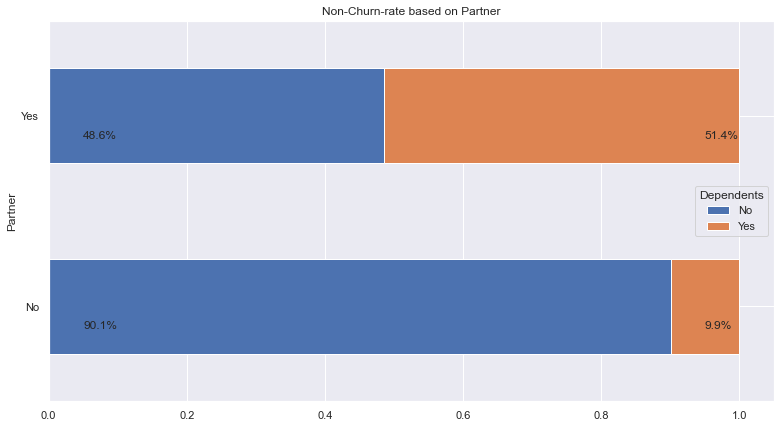

In [154]:
stacked_hbar_chart(df, 'Partner','Dependents', 'y')

## Customer Account Information
Contract | PaperlessBilling | PaymentMethod |

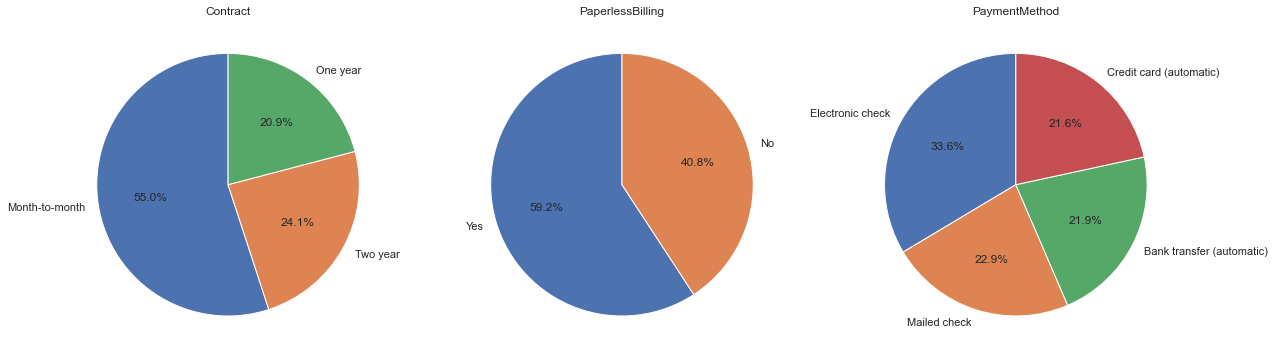

In [114]:
customer_info = ['Contract', 'PaperlessBilling', 'PaymentMethod']
fig, ax = plt.subplots(1,3, figsize= (20,10))
for i, item in enumerate(customer_info):
    data = df[item].value_counts()
    ax[i].pie(data.values, labels=data.index, autopct='%1.1f%%', startangle = 90)
    ax[i].set_title(item)

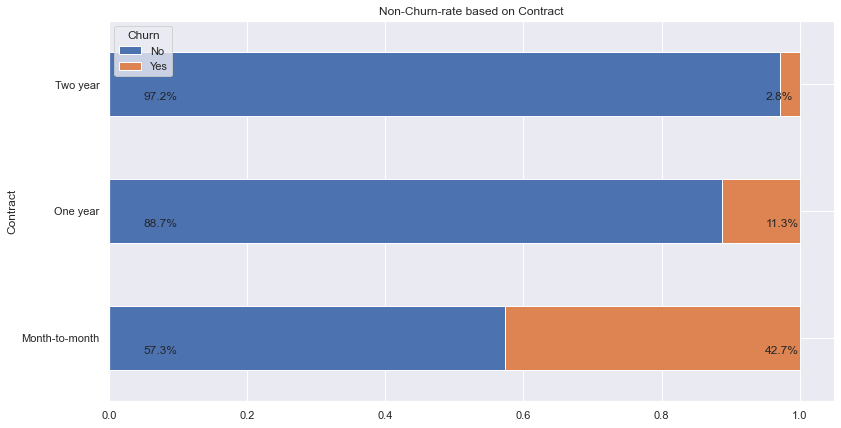

In [120]:
stacked_hbar_chart(df, 'Contract', 'Churn', 'y')

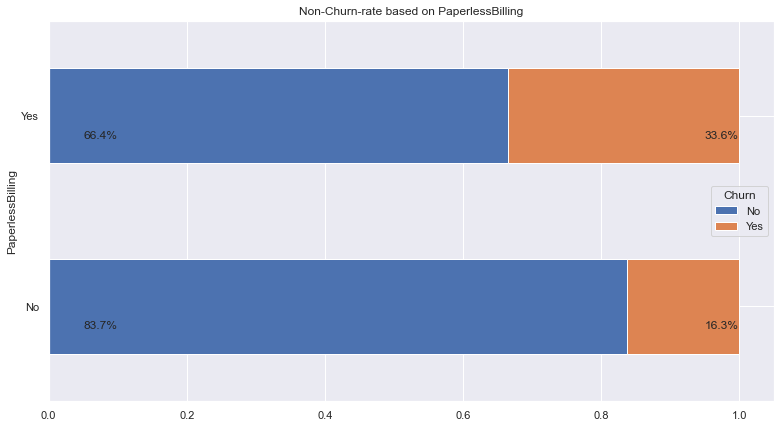

In [122]:
stacked_hbar_chart(df, 'PaperlessBilling', 'Churn', 'y')

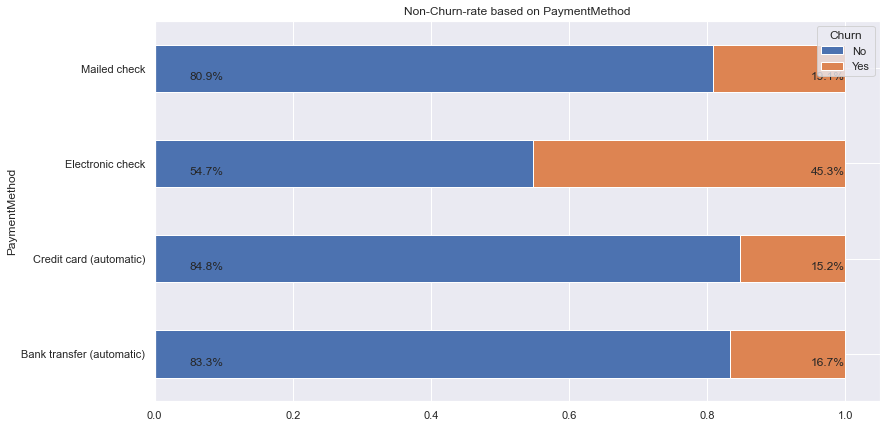

In [123]:
stacked_hbar_chart(df, 'PaymentMethod', 'Churn', 'y')

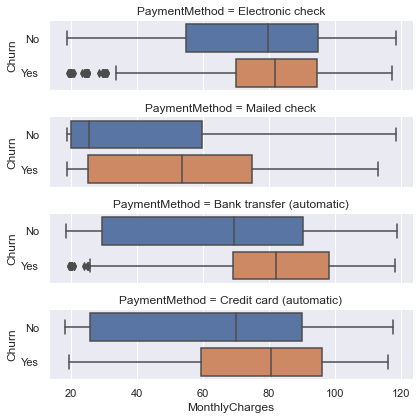

In [171]:
sns.catplot(data=df, x="MonthlyCharges", y="Churn", row="PaymentMethod", kind="box", height=1.5, aspect=4, orient='h')

## Numerical features

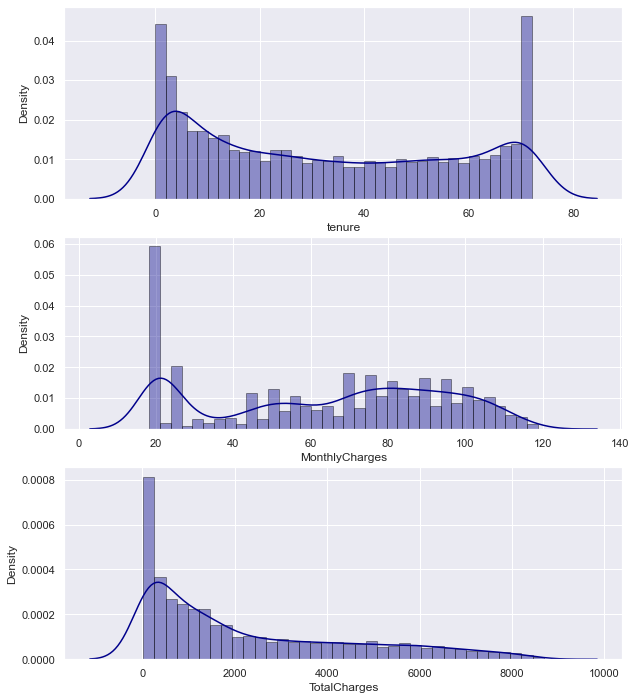

In [144]:
numeric_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, ax = plt.subplots(3,1, figsize= (10,12))

for i, item in enumerate(numeric_col):
    sns.distplot(df[item], hist=True, kde=True, bins=int(180/5), ax= ax[i], color = 'darkblue', hist_kws={'edgecolor':'black'})


Text(0.5, 1.0, 'Two Year Contract')

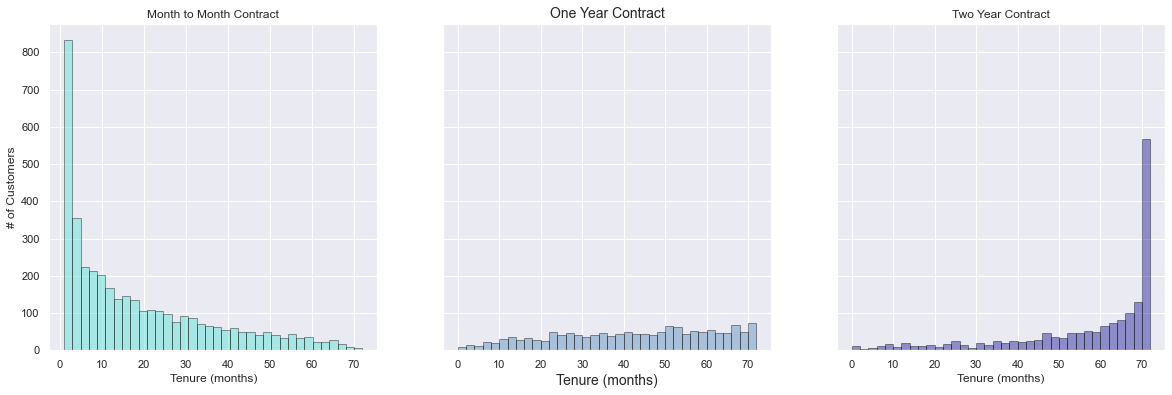

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

sns.distplot(df[df['Contract']=='Month-to-month']['tenure'], hist=True, kde=False, bins=int(180/5), color = 'turquoise', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4}, ax=ax[0])
ax[0].set_ylabel('# of Customers')
ax[0].set_xlabel('Tenure (months)')
ax[0].set_title('Month to Month Contract')

sns.distplot(df[df['Contract']=='One year']['tenure'], hist=True, kde=False, bins=int(180/5), color = 'steelblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4}, ax=ax[1])
ax[1].set_xlabel('Tenure (months)',size = 14)
ax[1].set_title('One Year Contract',size = 14)

sns.distplot(df[df['Contract']=='Two year']['tenure'], hist=True, kde=False, bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4}, ax=ax[2])

ax[2].set_xlabel('Tenure (months)')
ax[2].set_title('Two Year Contract')

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

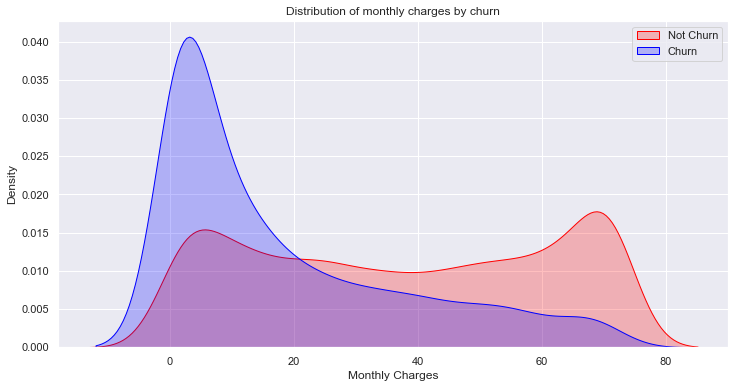

In [160]:
fig, ax = plt.subplots(1,1, figsize = (12,6))
sns.kdeplot(df[df["Churn"] == 'No']['tenure'], color="Red", shade = True)
sns.kdeplot(df[df["Churn"] == 'Yes']['tenure'], color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

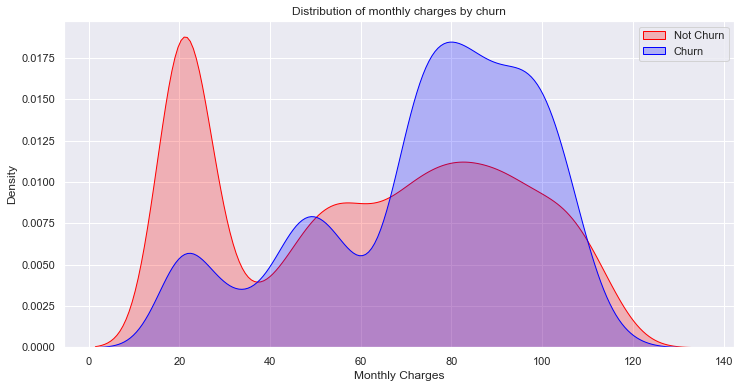

In [158]:
fig, ax = plt.subplots(1,1, figsize = (12,6))
sns.kdeplot(df[df["Churn"] == 'No']['MonthlyCharges'], color="Red", shade = True)
sns.kdeplot(df[df["Churn"] == 'Yes']['MonthlyCharges'], color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

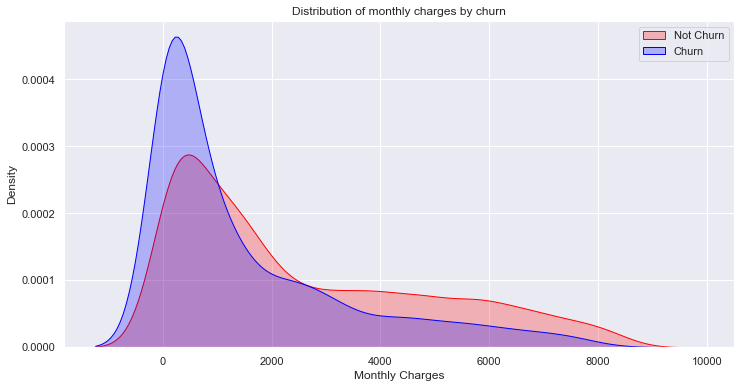

In [159]:
fig, ax = plt.subplots(1,1, figsize = (12,6))
sns.kdeplot(df[df["Churn"] == 'No']['TotalCharges'], color="Red", shade = True)
sns.kdeplot(df[df["Churn"] == 'Yes']['TotalCharges'], color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

## Services used by customers

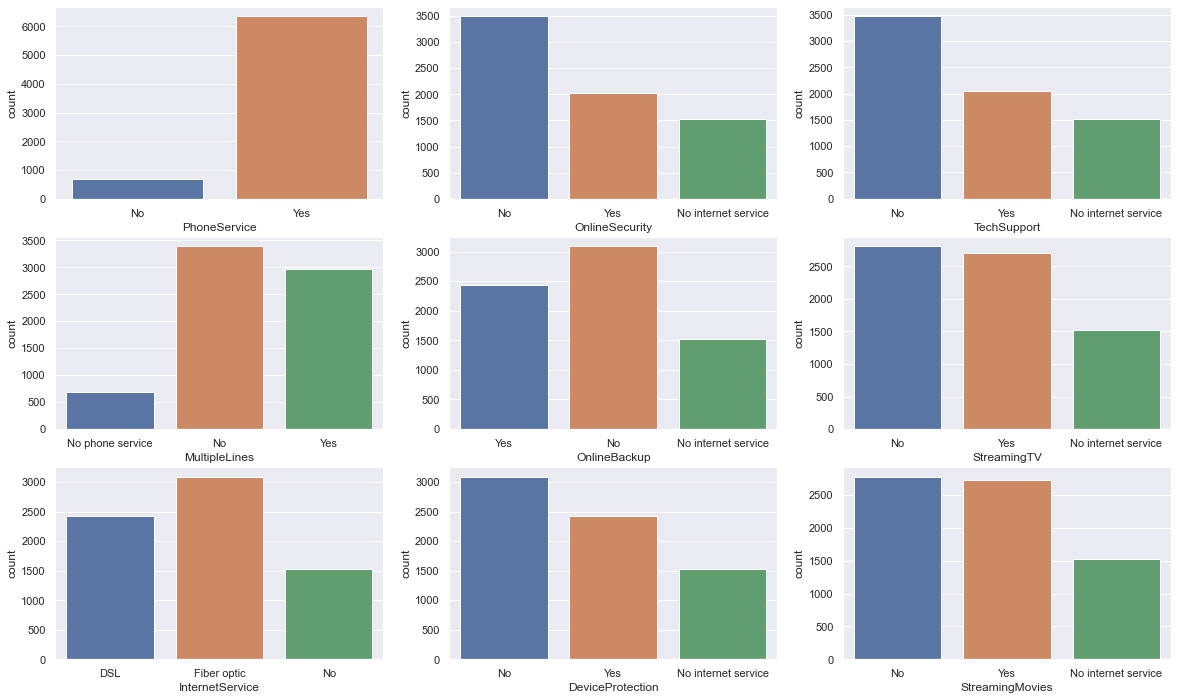

In [85]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
               'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, ax = plt.subplots(3, 3, figsize = (20, 12))
for i, item in enumerate(services):
    if i < 3:
        sns.countplot(x= df[item], ax= ax[i,0])
    elif i >=3 and i < 6:
        sns.countplot(x= df[item], ax= ax[i-3,1])
    elif i < 9:
        sns.countplot(x= df[item], ax= ax[i-6,2])

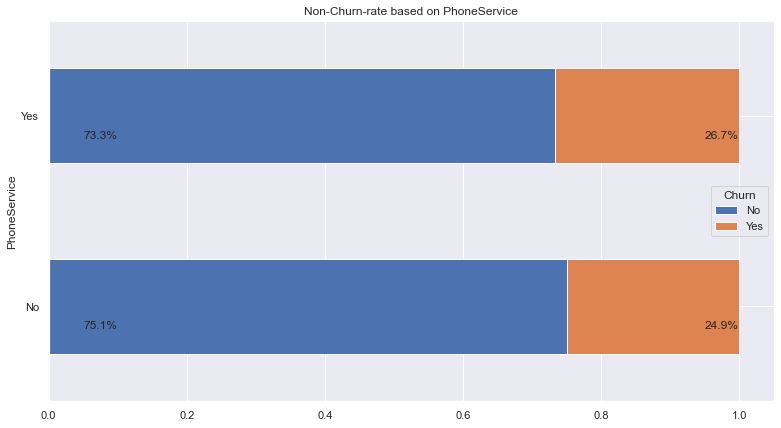

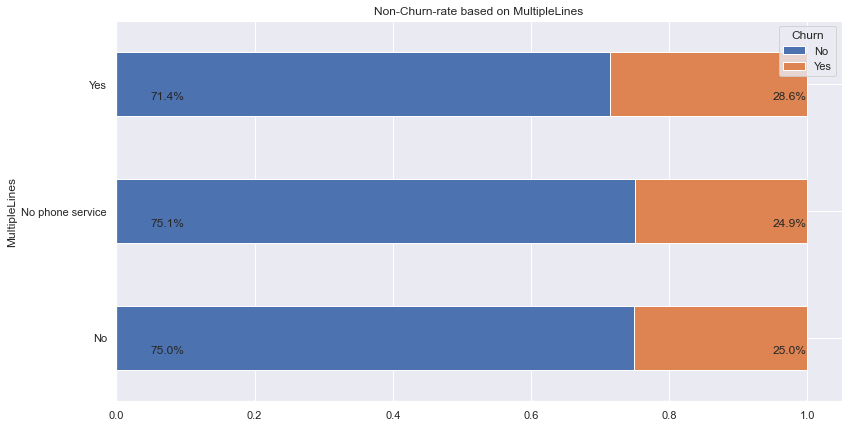

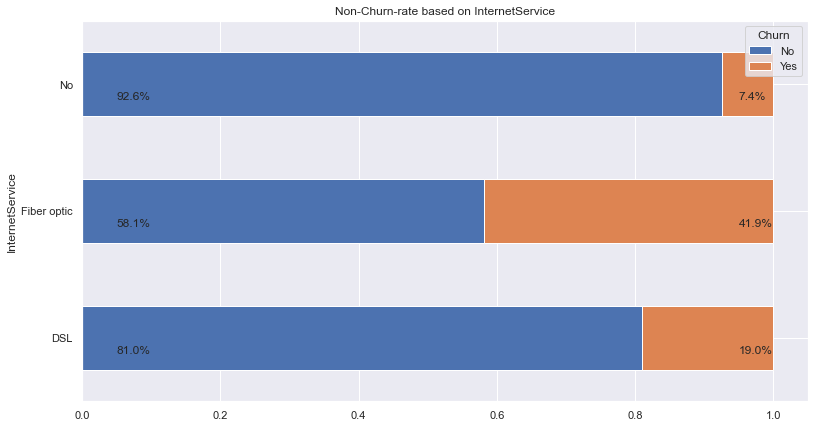

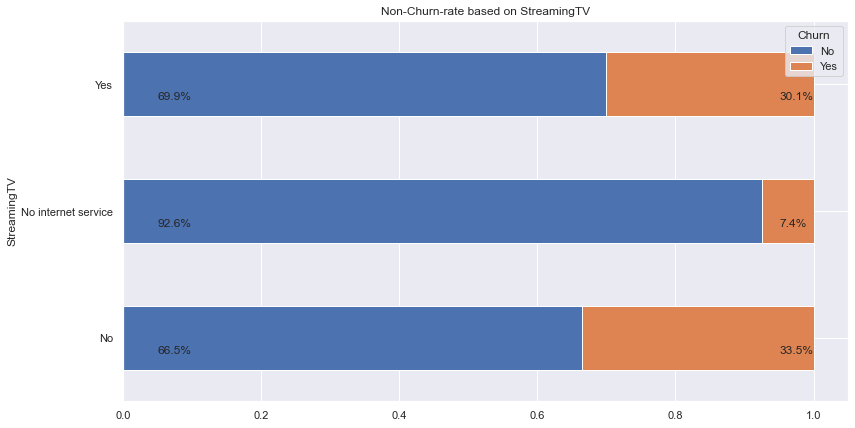

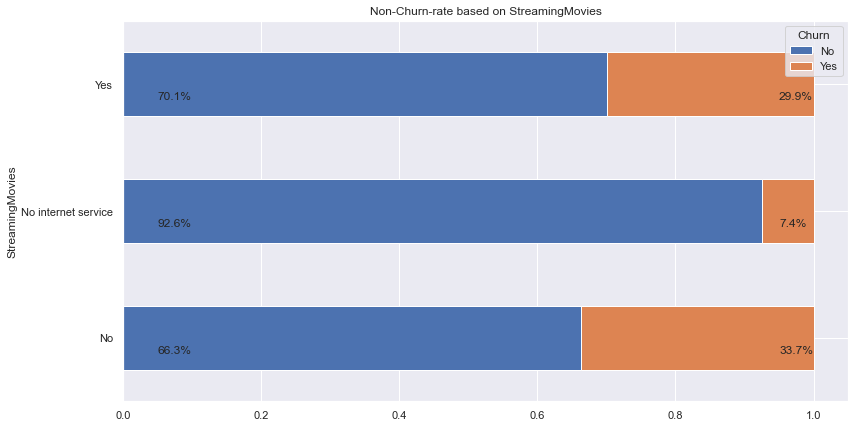

In [140]:
normal_services = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies']

for i, item in enumerate(normal_services):
    stacked_hbar_chart(df, item, 'Churn', 'y',)

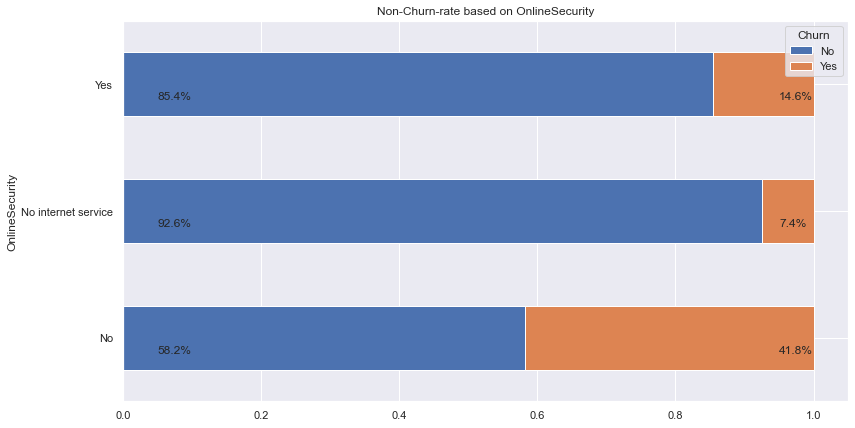

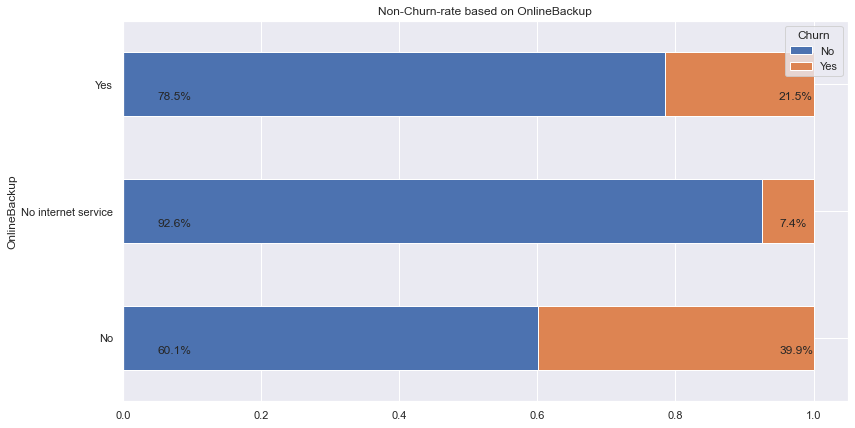

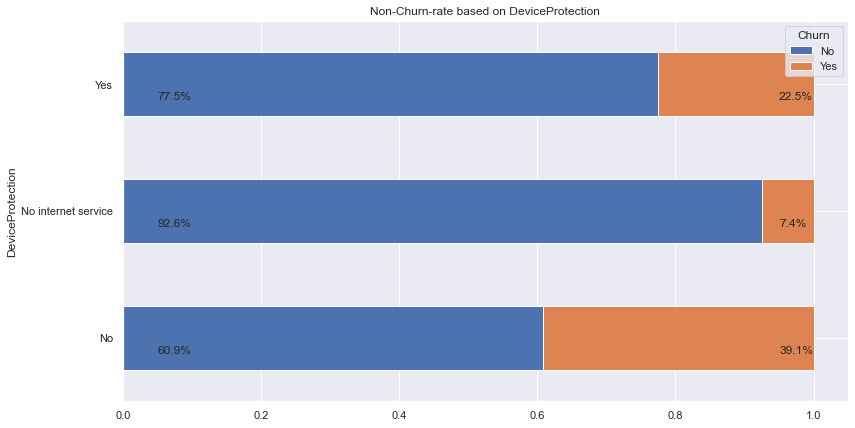

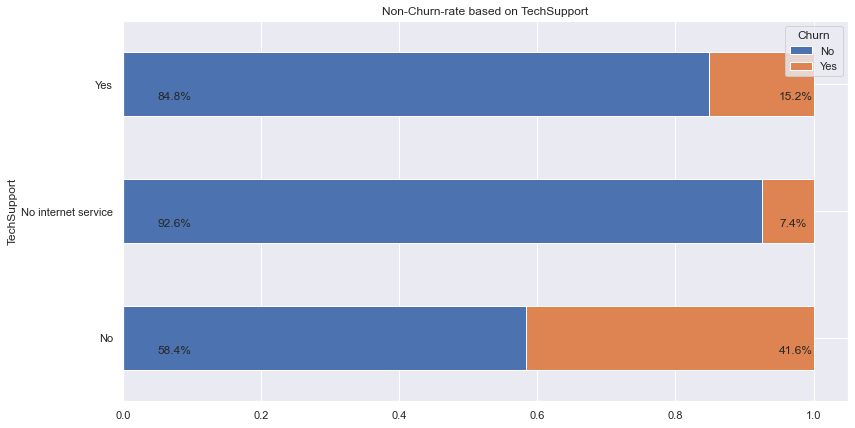

In [142]:
security_services = ['OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport']

for i, item in enumerate(security_services):
    stacked_hbar_chart(df, item, 'Churn', 'y',)

# PART 3: FEATURE ENGINEERING

In [ ]:
### Use label encoding with the following binary variables: (1) gender, (2) Partner, (3) Dependents, (4)PaperlessBilling, 
###(5)PhoneService , and (6)Churn .
### make a copy of your dataframe
df_transformed = df.copy()

# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents', \
                          'PaperlessBilling', 'PhoneService', 'Churn']
encoder = LabelEncoder()
for col in label_encoding_columns:
    df_transformed[col] = encoder.fit_transform(df[col])              

In [ ]:
### Apply one-hot encoding to the following categorical variables: (1) Contract, (2) PaymentMethod, (3) MultipleLines, 
### (4) InternetServices, (5) OnlineSecurity, (6) OnlineBackup, (7) DeviceProtection, (8) TechSupport, (9) StreamingTV,
### and (10)StreamingMovies.
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']
df_transformed = pd.get_dummies(df_transformed, columns=one_hot_encoding_columns,\
                                drop_first='True')

In [ ]:
### Normalization
### Use the min-max method to rescale the numeric columns (tenure, MontlyCharges, and TotalCharges) to a common scale
# min-max normalization (numeric variables)
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# scale numerical variables using min max scaler
scaler = MinMaxScaler()
for col in min_max_columns:
    df_transformed[col] = scaler.fit_transform(df[[col]])

# PART 4: MODELING

Evaluate Machine Learning Algorithms:
- Train and Validation Sets
- K-Fold Cross Validation

CREATE A VALIDATION DATASET

In [ ]:
#SPLIT INTO TRAIN AND TEST SETS
from sklearn.model_selection import train_test_split
# select independent variables

X = df_transformed.drop(columns=['customerID', 'Churn'],axis=1).fillna(0)
y = df_transformed['Churn']
X_train, X_validation, y_train, y_validation =\
train_test_split(X, y, test_size=0.3, random_state = 99)

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)

KFOLD CROSS-VALIDATION

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 99
kfold = KFold(n_splits = num_folds, random_state = seed,shuffle=True)
rf_model = RandomForestClassifier()
results  = cross_val_score(rf_model,X_train,y_train,cv=kfold)
for i in range(0,10):
    print("accuracy on fold"+str(i),results[i]*100)

In [ ]:
print(results.mean(),results.std())

CLASSIFICATION METRICS:
    - Classification accuracy
    - Area Under ROC Curve
    - Confusion Matrix
    - Classification Report

In [ ]:
scoring = "roc_auc"
results  = cross_val_score(rf_model,X_train,y_train,cv=kfold,scoring=scoring)
print(results.mean(),results.std())

In [ ]:
results

CHOOSE THE BEST MACHINE LEARNING MODEL
The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is
evaluated in the same way on the same data

HYPERPARAMETER TUNING
- Grid Search Parameter Tuning
- Random Search Parameter Tuning